# Análisis de una solución de la ecuación del calor

La solución de la ecuación
$$\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}$$
sujeta a las condiciones de frontera:
$$u(0,t)=u(1,t)=0, \;\;\; t>0$$
Y la condición inicial:
$$u(x,0)=x,\;\;\;0<x<1$$
Esta dada en términos de la serie de Fourier por la expresión:
$$u(x,t)=\frac{2}{\pi}\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n}  \sin(n\pi x)e^{-(n\pi)^2 t}.$$

Este problema modela la transferencia de calor en una barra ideal delgada, con $k=1$.

In [26]:
from pylab import *

Para empezar, graficamos la condición inicial.

In [27]:
def recta(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = x[i]
    return y

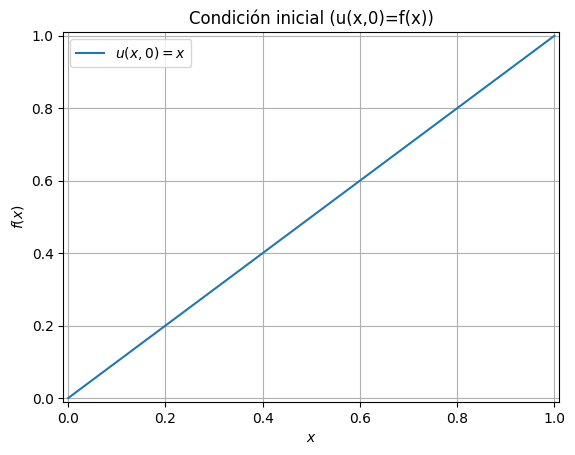

In [28]:
x = linspace(0,1,1000)
f = recta(x)
plot(x,f,label='$u(x,0)=x$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Condición inicial (u(x,0)=f(x))")
xlim([-0.01,1.01]),ylim([-0.01,1.01]),grid(),legend()
show()

Usamos una serie de Fourier para aproximar la condición inicial $u(x,0)=f(x)=x$.

In [30]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += (-1)**(n+1)*sin(n*pi*x)/(n)
    return (2.0/pi)*f

Podemos visualizar la aproximación para diferentes cantidades de armónicos.

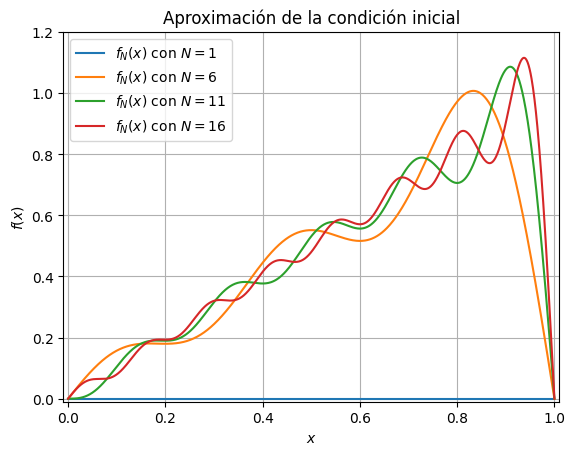

In [31]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Ahora, agregamos la parte temporal para visualizar la solución completa. Primero, para el momento inicial, $t=0$.

In [32]:
def u_x_t(x,t,N=50):
    f = zeros( (len(x),len(t)) )
    for i in range(len(t)):
        for n in range(1,N):
            f[:,i] += (-1)**(n+1)*sin(n*pi*x)/(n)*exp(-n**2*pi**2*t[i])
    return (2.0/pi)*f

In [33]:
x = linspace(0,1,1000)
t = linspace(0,10,1000)
U = u_x_t(x,t)

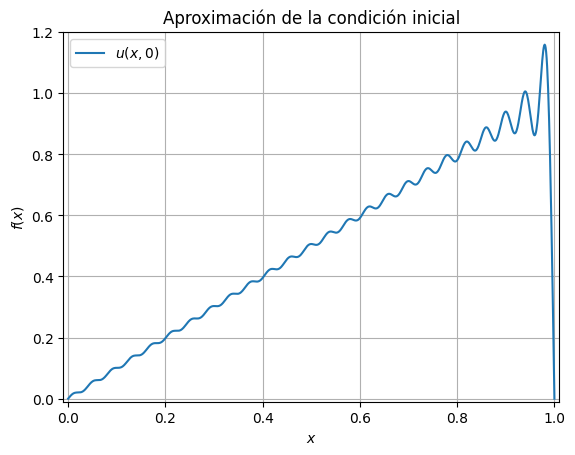

In [34]:
plot(x,U[:,0],label='$u(x,0)$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$');
plt.title("Aproximación de la condición inicial")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Luego, para diferentes tiempos, lo cual nos permite ver cómo la solución evoluciona cuando $t \to \infty$.

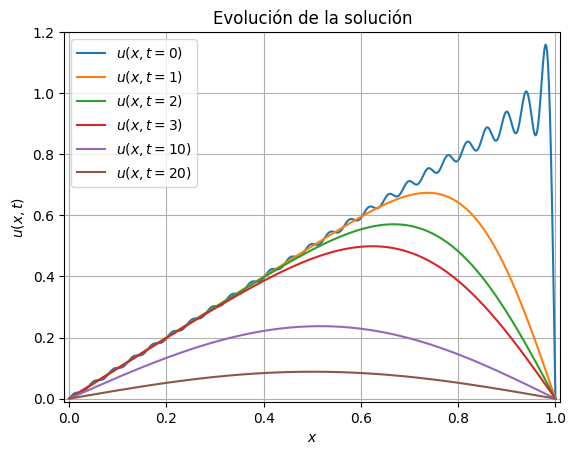

In [35]:
plot(x,U[:,0],label='$u(x,t=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,t=1)$')
plot(x,U[:,2],label='$u(x,t=2)$')
plot(x,U[:,3],label='$u(x,t=3)$')
plot(x,U[:,10],label='$u(x,t=10)$')
plot(x,U[:,20],label='$u(x,t=20)$')
plt.xlabel('$x$'); plt.ylabel('$u(x,t)$');
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-0.01,1.2]),grid(),legend()
show()

Y podemos ver esto en una gráfica en 3D.

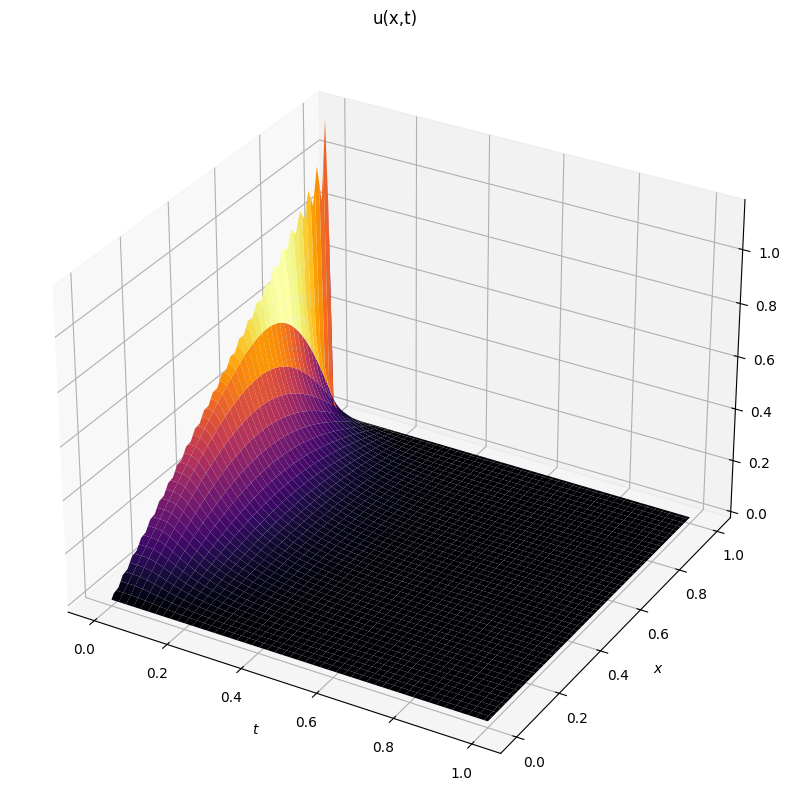

In [36]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
t = linspace(0,1.0,100)

X,T = np.meshgrid(x,t)

U = u_x_t(x,t)

plt.xlabel('$t$'); plt.ylabel('$x$');
plt.title("u(x,t)")
ax.plot_surface(X, T, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"

#Ejercicio de aplicación

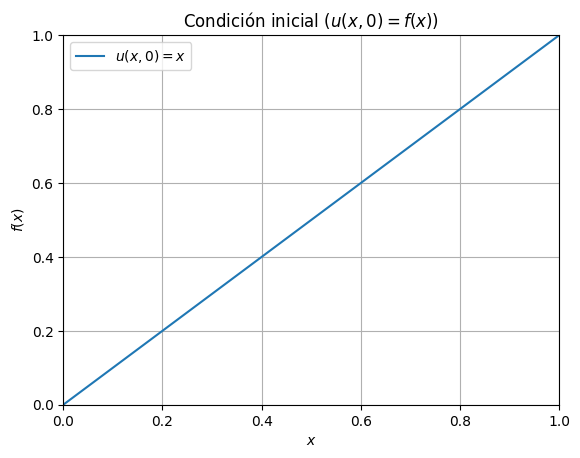

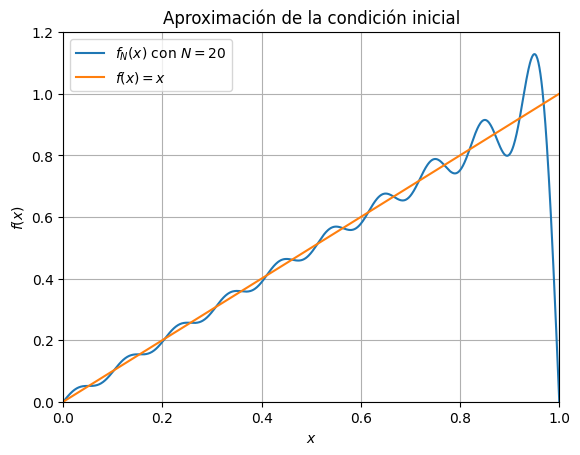

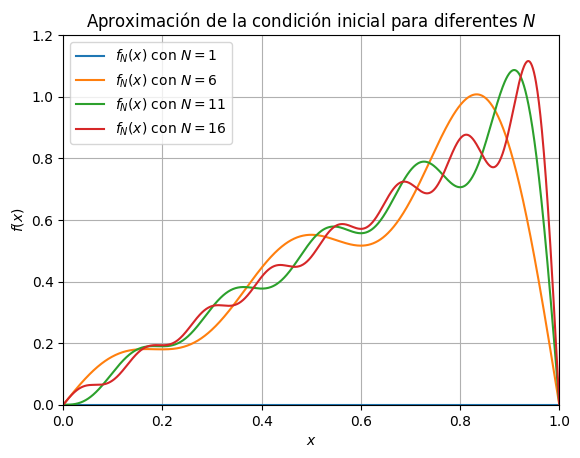

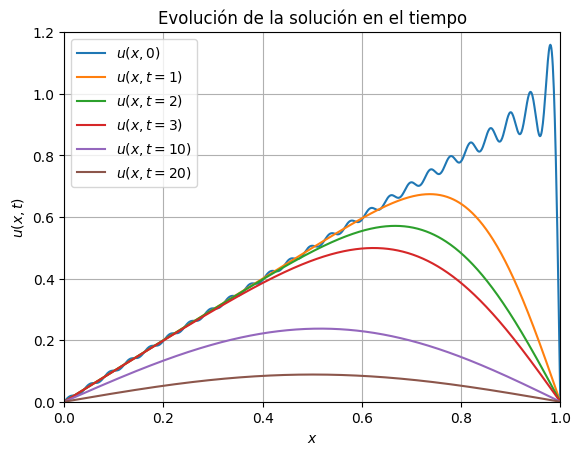

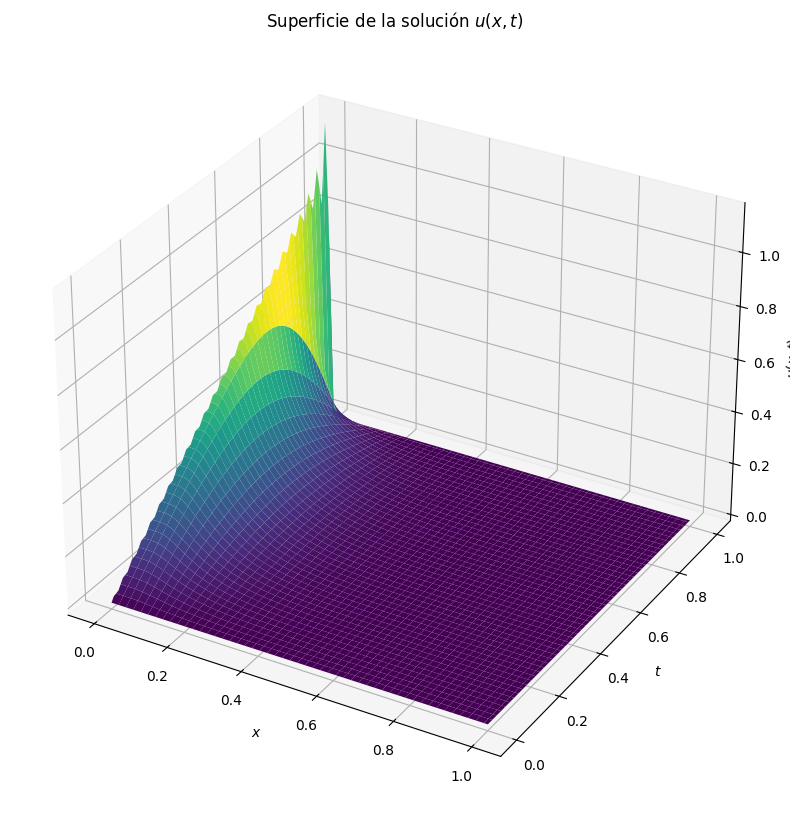

In [25]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D  # Importación necesaria para graficar en 3D

# Función para definir la recta inicial
def recta(x):
    y = x  # Simplificación para evitar bucle
    return y

# Variables iniciales
x = linspace(0, 1, 1000)
f = recta(x)

# Gráfica de la condición inicial
plot(x, f, label='$u(x,0)=x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Condición inicial ($u(x,0)=f(x)$)")
xlim([0, 1])  # Ajuste para evitar excesos visuales
ylim([0, 1])
grid()
legend()
show()

# Aproximación por armónicos de Fourier
def u_0(x, N=20):  # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1, N):
        f += (-1)**(n+1) * sin(n * pi * x) / n
    return (2.0 / pi) * f

# Graficar la aproximación
f_n = u_0(x)
plot(x, f_n, label='$f_N(x)$ con $N=20$')
plot(x, f, label='$f(x)=x$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial")
xlim([0, 1])
ylim([0, 1.2])  # Pequeña expansión para mayor claridad
grid()
legend()
show()

# Variación de la aproximación con diferentes valores de N
for i in range(1, 20, 5):
    plot(x, u_0(x, i), label='$f_N(x)$ con $N=%d$' % i)
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.title("Aproximación de la condición inicial para diferentes $N$")
xlim([0, 1])
ylim([0, 1.2])
grid()
legend()
show()

# Solución de la ecuación de calor
def u_x_t(x, t, N=50):
    f = zeros((len(x), len(t)))
    for i in range(len(t)):
        for n in range(1, N):
            f[:, i] += (-1)**(n+1) * sin(n * pi * x) / n * exp(-n**2 * pi**2 * t[i])
    return (2.0 / pi) * f

# Variables para solución dependiente de tiempo
x = linspace(0, 1, 1000)
t = linspace(0, 10, 1000)
U = u_x_t(x, t)

# Graficar la evolución en el tiempo
plot(x, U[:, 0], label='$u(x,0)$')
plot(x, U[:, 1], label='$u(x,t=1)$')
plot(x, U[:, 2], label='$u(x,t=2)$')
plot(x, U[:, 3], label='$u(x,t=3)$')
plot(x, U[:, 10], label='$u(x,t=10)$')
plot(x, U[:, 20], label='$u(x,t=20)$')
plt.xlabel('$x$')
plt.ylabel('$u(x,t)$')
plt.title("Evolución de la solución en el tiempo")
xlim([0, 1])
ylim([0, 1.2])
grid()
legend()
show()

# Gráfica 3D de la solución
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0, 1.0, 100)
t = linspace(0, 1.0, 100)

X, T = np.meshgrid(x, t)
U = u_x_t(x, t)

ax.plot_surface(X, T, U, cmap="viridis")  # Cambiado a "viridis" para mejor visualización
ax.set_xlabel('$x$')
ax.set_ylabel('$t$')
ax.set_zlabel('$u(x,t)$')
plt.title("Superficie de la solución $u(x,t)$")
show()


Importación de librerías

In [ ]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D  # Importación necesaria para graficar en 3D


Impresión de la expresión general de la solución